In [ ]:
# upload kaggle.json
# import kaggle
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle
import kaggle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm.auto import tqdm
import sklearn
import tensorflow as tf
import os

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:05<00:00, 199MB/s]
100% 812M/812M [00:05<00:00, 155MB/s]


In [ ]:
! unzip -q dogs-vs-cats.zip

In [ ]:
! rm test1.zip sampleSubmission.csv

In [ ]:
! unzip -q train.zip

In [ ]:
import os

In [ ]:
len(os.listdir("train"))

25000

In [ ]:
os.listdir("train")[:10]

['dog.6341.jpg',
 'dog.4215.jpg',
 'cat.945.jpg',
 'cat.6052.jpg',
 'cat.1527.jpg',
 'cat.8402.jpg',
 'cat.5002.jpg',
 'cat.96.jpg',
 'cat.4708.jpg',
 'cat.1497.jpg']

In [ ]:
# 1. These images are colored or 3 channel images
# 2. Data has 25000 images across 2 category dogs and cats (12500 cats, 12500 dogs)
# 3. These images are not of same shape

In [ ]:
imageName = "dog.10001.jpg"
testimage = cv2.imread("train/" + imageName)
print(testimage.shape)
print(testimage.shape[0]) # height
print(testimage.shape[1]) # width

(151, 109, 3)
151
109


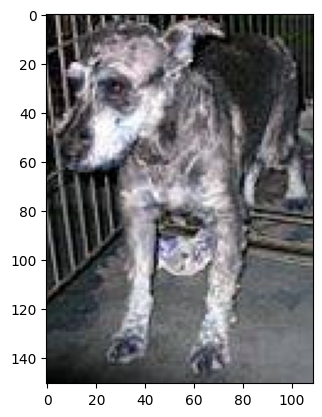

In [ ]:
plt.imshow(testimage)

In [ ]:
imageName.split(".")[0]

'dog'

In [ ]:
# empty dataframe
data = pd.DataFrame(columns = ["imageName", "height", "width", "category"])
# empty lists
imageName = []
height = []
width = []
category = []
# Iterate over all the 25k images
for _image in os.listdir("train"):
  # reading the image using cv2
  image = cv2.imread("train/" + _image)
  imageName.append(_image)
  height.append(image.shape[0])
  width.append(image.shape[1])
  category.append(_image.split(".")[0])

In [ ]:
data["imageName"] = imageName
data["height"] = height
data["width"] = width
data["category"] = category

In [ ]:
data.head()

,imageName,height,width,category
0,dog.6341.jpg,374,500,dog
1,dog.4215.jpg,375,499,dog
2,cat.945.jpg,375,499,cat
3,cat.6052.jpg,443,447,cat
4,cat.1527.jpg,412,500,cat


In [ ]:
data.category.value_counts()

dog    12500
cat    12500
Name: category, dtype: int64

In [ ]:
data.height.mean(), data.height.median()

(360.47808, 374.0)

In [ ]:
data.width.mean(), data.width.median()

(404.09904, 447.0)

In [ ]:
data.describe()

,height,width
count,25000.000000,25000.00000
mean,360.478080,404.09904
std,97.019959,109.03793
min,32.000000,42.00000
25%,301.000000,323.00000
50%,374.000000,447.00000
75%,421.000000,499.00000
max,768.000000,1050.00000


In [ ]:
# Training Data
# x_train -images , y_train - labels

# Testing Data
# x_test - images, y_test - labels

In [ ]:
# x_train
# MNIST - 60k, 28, 28 - num_of_images x height x width
# DogVsCat - num_of_images x height x width x channel - (25k, 150, 150, 3)

In [ ]:
testimage.shape

(151, 109, 3)

In [ ]:
testimage1 = cv2.resize(testimage, (100, 100))

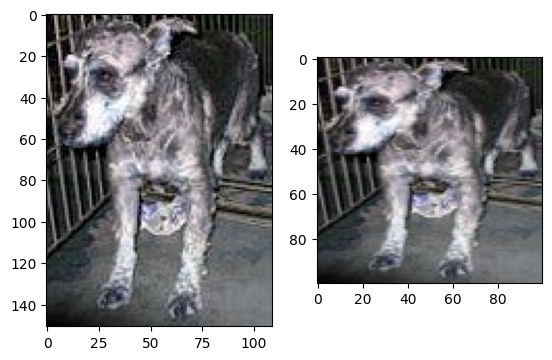

In [ ]:
plt.subplot(1, 2, 1 )
plt.imshow(testimage)

plt.subplot(1, 2, 2)
plt.imshow(testimage1)

In [ ]:
# empty list in which we will append all images
imageList = []
labelList = []
for imageName in tqdm(os.listdir("train/")):
  image = cv2.imread("train/" + imageName)
  image = cv2.resize(image, (150, 150))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  imageList.append(image)
  # 1 = dog, 0 = cat
  if imageName.startswith("dog"):
    labelList.append(1)
  else:
    labelList.append(0)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
len(imageList) # 25k images

25000

In [ ]:
len(labelList) # 25k labels

25000

In [ ]:
X = np.array(imageList)
Y = np.array(labelList)

In [ ]:
X.shape

(25000, 150, 150, 3)

In [ ]:
Y.shape

(25000,)

In [ ]:
# X - x_train, x_test
# Y - y_train, y_test

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# ?train_test_split
# del x_train, y_train, x_test, y_test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.85, stratify=Y)

In [ ]:
x_train.shape, y_train.shape

((3750, 150, 150, 3), (3750,))

In [ ]:
x_test.shape, y_test.shape

((21250, 150, 150, 3), (21250,))

Label is :1


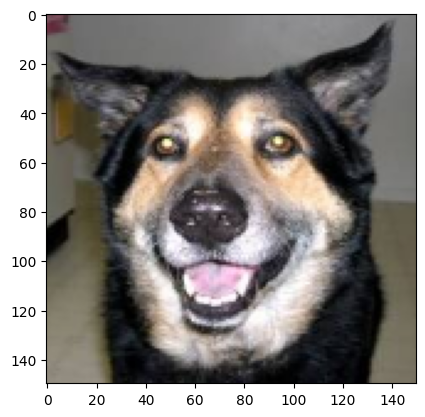

In [ ]:
num = 122
plt.imshow(x_train[num])
print(f"Label is :{y_train[num]}")

In [ ]:
pd.DataFrame(y_train).value_counts()

0    1875
1    1875
dtype: int64

In [ ]:
# Normalisation
x_train = x_train / 255.0

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
y_train.shape

(3750, 2)

In [ ]:
x_train.shape, y_train.shape

((3750, 150, 150, 3), (3750, 2))

In [ ]:
# 1 Image
150 * 150 * 3

67500

In [ ]:
# del model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150, 150, 3), name="Input"))
model.add(tf.keras.layers.Flatten(name="Flat")) #67500
model.add(tf.keras.layers.Dense(128, activation='relu', name="Dense1"))
model.add(tf.keras.layers.Dense(16, activation='relu', name="Dense2"))
model.add(tf.keras.layers.Dense(2, activation='softmax', name="Output"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flat (Flatten)              (None, 67500)             0         
                                                                 
 Dense1 (Dense)              (None, 128)               8640128   
                                                                 
 Dense2 (Dense)              (None, 16)                2064      
                                                                 
 Output (Dense)              (None, 2)                 34        
                                                                 
Total params: 8642226 (32.97 MB)
Trainable params: 8642226 (32.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#8.6M parameters

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics = ["acc"])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
106/106 [==============================] - 11s 100ms/step - loss: 0.7000 - acc: 0.5292 - val_loss: 0.6785 - val_acc: 0.5280
Epoch 2/20
106/106 [==============================] - 7s 63ms/step - loss: 0.6808 - acc: 0.5763 - val_loss: 0.6721 - val_acc: 0.5840
Epoch 3/20
106/106 [==============================] - 9s 83ms/step - loss: 0.6744 - acc: 0.5905 - val_loss: 0.6554 - val_acc: 0.6027
Epoch 4/20
106/106 [==============================] - 7s 62ms/step - loss: 0.6663 - acc: 0.6027 - val_loss: 0.6493 - val_acc: 0.6187
Epoch 5/20
106/106 [==============================] - 9s 80ms/step - loss: 0.6586 - acc: 0.6077 - val_loss: 0.6436 - val_acc: 0.6320
Epoch 6/20
106/106 [==============================] - 6s 61ms/step - loss: 0.6533 - acc: 0.6163 - val_loss: 0.6484 - val_acc: 0.6187
Epoch 7/20
106/106 [==============================] - 9s 81ms/step - loss: 0.6452 - acc: 0.6290 - val_loss: 0.7128 - val_acc: 0.5387
Epoch 8/20
106/106 [==============================] - 7s 63ms/step 

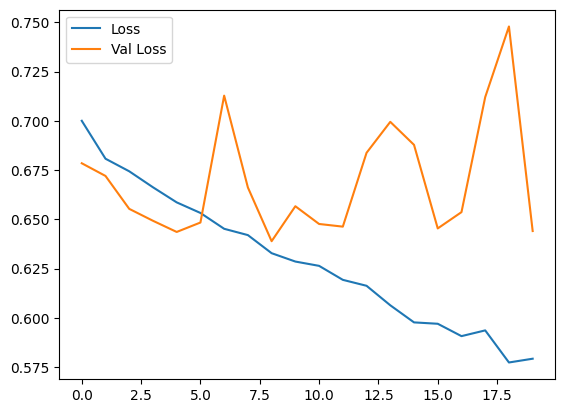

In [ ]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["val_loss"], label="Val Loss")
plt.legend()

In [ ]:
# how to read images as grayscale?

(375, 499, 3)


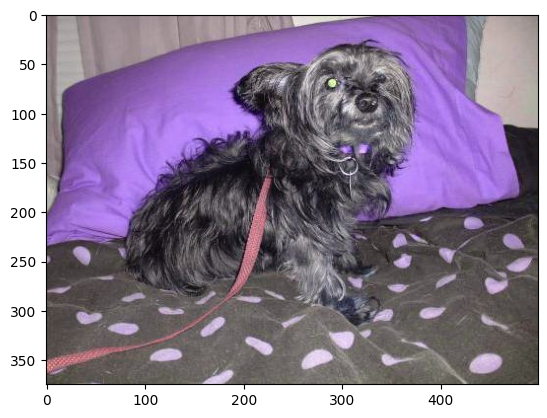

In [ ]:
test = cv2.imread("train/dog.0.jpg")
print(test.shape)
plt.imshow(test)

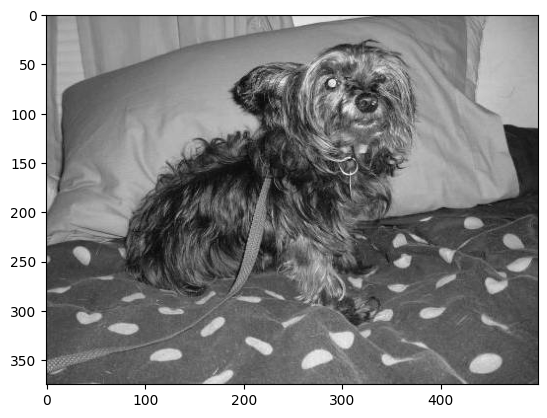

In [ ]:
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2GRAY), cmap="gray")

(375, 499)


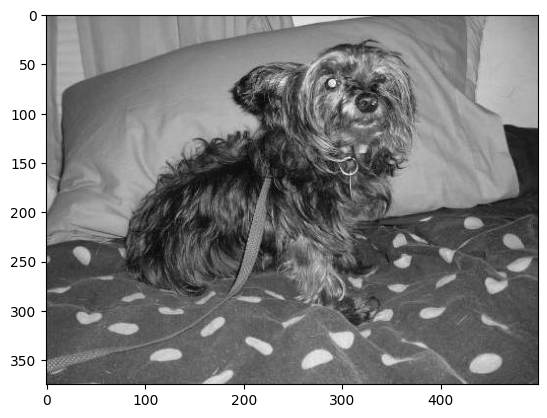

In [ ]:
test_gray = cv2.imread("train/dog.0.jpg", 0)
print(test_gray.shape)
plt.imshow(test_gray, cmap="gray")